In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import auc,accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


In [2]:
class ModelBuild:
    def __init__(self,data_train,data_test,label_trans):
        self.data_train = data_train
        self.data_test = data_test
        self.label_trans = label_trans
        
    def make_label(self):
        def replace_value(value):
            for key, replacement in self.label_trans.items():
                if key in value:
                    return replacement
            return value
        self.data_train_y = self.data_train['Acession'].apply(replace_value)
        self.data_test_y = self.data_test['Acession'].apply(replace_value)
        self.feature = [col for col in self.data_test.columns.tolist() if col != 'Acession' ]
        self.data_train_std = StandardScaler().fit_transform(self.data_train[self.feature])
        self.data_test_std = StandardScaler().fit_transform(self.data_test[self.feature])
        
        
    def train_model(self):
        self.clf = SVC(kernel='linear',gamma="auto" , degree=1, cache_size=5000).fit( self.data_train_std, self.data_train_y)
        self.fpr,  self.tpr,  self.thresholds = metrics.roc_curve(self.data_test_y , self.clf.decision_function( self.data_test_std ))
        accuracy = accuracy_score(self.data_test_y,self.clf.predict( self.data_test_std))
        self.AUC = auc( self.fpr,  self.tpr)
        print ('AUC:{}   Accuracy:{}'.format( self.AUC,accuracy))
    
    def get_confusion_matrix(self):
        cm = confusion_matrix(self.data_test_y,self.clf.predict( self.data_test_std))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.clf.classes_)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title('Confusion matrix: data_{}'.format(self.data_test_std.shape[0]))
        plt.show()
        
    def get_roc_auc(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.fpr, self.tpr, color='blue', lw=2, label=f'ROC curve (area = {self.AUC:.2f})')
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

        
    def get_pca(self):
        pca = PCA(n_components=2)
        self.X_test_pca = pca.fit_transform(self.data_test[self.feature])
        colors = ['lightskyblue' if label == 0 else 'red' for label in self.data_test_y]
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X_test_pca[:, 0], self.X_test_pca[:, 1], c=colors, alpha=0.5)
        plt.scatter([], [], c='lightskyblue', alpha=0.5, label='Class 0')
        plt.scatter([], [], c='red', alpha=0.5, label='Class 1')
        plt.legend(loc='lower right')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA of Test Set')

In [3]:
data_297=pd.read_excel(r"./data/dataset.xlsx",sheet_name="297_CSF")
data_114_CSF=pd.read_excel(r"./data/dataset.xlsx",sheet_name="114_CSF")
data_36_CSF=pd.read_excel(r"./data/dataset.xlsx",sheet_name="36_CSF")
data_39_CSF=pd.read_excel(r"./data/dataset.xlsx",sheet_name="39_CSF")
data_120_CSF=pd.read_excel(r"./data/dataset.xlsx",sheet_name="120_CSF")
data_54_MCI = pd.read_excel(r"./data/dataset.xlsx",sheet_name="54_CSF_MCI")


In [4]:
data_muti_CSF = pd.read_excel(r"./data/dataset.xlsx",sheet_name="78_muti_CSF")
data_CON_PD = data_muti_CSF[data_muti_CSF['Acession'].isin(('Control',"ALS"))]
data_CON_PD = data_muti_CSF[data_muti_CSF['Acession'].isin(('Control',"PD"))]
data_CON_FTD = data_muti_CSF[data_muti_CSF['Acession'].isin(('Control',"FTD"))]
data_CON_AD = data_muti_CSF[data_muti_CSF['Acession'].isin(('Control',"AD"))]

In [319]:
#入参只需要更改：data_test
model_build = ModelBuild(data_train=data_297,data_test=data_114_CSF,label_trans={'Con':0,'AD':1,'MCI':1,"FTD":1,"PD":1,"ALS":1})
model_build.make_label()        

In [320]:
model_build.train_model()

AUC:0.9026063100137174   Accuracy:0.8703703703703703


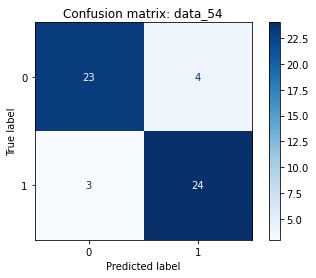

In [321]:
model_build.get_confusion_matrix()

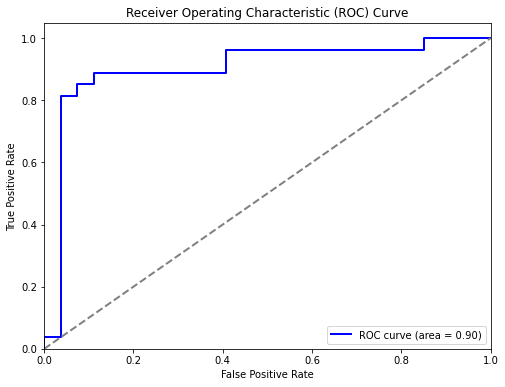

In [322]:
model_build.get_roc_auc()

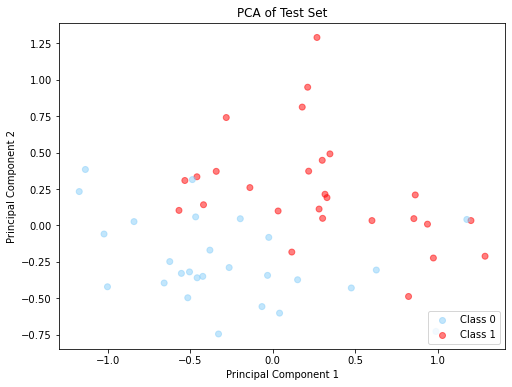

In [323]:
model_build.get_pca()

In [5]:
data_182_DLPFC = pd.read_excel(r"./data/dataset.xlsx",sheet_name="182_DLPFC")

In [41]:
class DLPFC_ModelBuild(ModelBuild):
    def __init__(self,data,label_trans):
        self.data= data
        self.label_trans = label_trans        
    def make_label(self):
        def replace_value(value):
            for key, replacement in self.label_trans.items():
                if key in value:
                    return replacement
            return value
        self.data_y= self.data['Acession'].apply(replace_value)
        self.feature = [col for col in self.data.columns.tolist() if col != 'Acession' ] 
        self.data = StandardScaler().fit_transform(self.data[self.feature])
        self.data_train_std, self.data_test_std, self.data_train_y , self.data_test_y = train_test_split( self.data, self.data_y,test_size=0.3)
    def train_model(self):
        self.clf = SVC(kernel='rbf',gamma="auto" , degree=1, cache_size=5000).fit( self.data_train_std, self.data_train_y)
        self.fpr,  self.tpr,  self.thresholds = metrics.roc_curve(self.data_test_y , self.clf.decision_function( self.data_test_std ))
        accuracy = accuracy_score(self.data_test_y,self.clf.predict( self.data_test_std))
        self.AUC = auc( self.fpr,  self.tpr)
        print ('AUC:{}   Accuracy:{}'.format( self.AUC,accuracy))
    
    def get_pca(self):
        pca = PCA(n_components=2)
        self.X_test_pca = pca.fit_transform(self.data)
        colors = ['lightskyblue' if label == 0 else 'red' for label in self.data_y]
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X_test_pca[:, 0], self.X_test_pca[:, 1], c=colors, alpha=0.5)
        plt.scatter([], [], c='lightskyblue', alpha=0.5, label='Class 0')
        plt.scatter([], [], c='red', alpha=0.5, label='Class 1')
        plt.legend(loc='lower right')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA of Test Set')
    
    
    # @staticmethod
    # def balance_dataset(X, y, n_samples=None, random_state=None):
    #     df = pd.DataFrame(X)
    #     df['label'] = y.values
    #     unique_labels = y.unique()
    #     min_count = min(y.value_counts()) if n_samples is None else n_samples
    #     balanced_df = pd.DataFrame()
    #     for label in unique_labels:
    #         class_data = df[df['label'] == label]
    #         resampled_data = resample(class_data, 
    #                                   replace=False, 
    #                                   n_samples=min_count, 
    #                                   random_state=random_state)
    #         balanced_df = pd.concat([balanced_df, resampled_data])
    #     X_balanced = balanced_df.drop('label', axis=1).values
    #     y_balanced = balanced_df['label']
    #     return X_balanced, y_balanced

In [42]:
dlpfc_ModelBuild = DLPFC_ModelBuild(data=data_182_DLPFC,label_trans={'Con':0,'AD':1,'MCI':1,"FTD":1,"PD":1,"ALS":1})

In [43]:
dlpfc_ModelBuild.make_label()

In [44]:
dlpfc_ModelBuild.train_model()

AUC:0.7282608695652173   Accuracy:0.6727272727272727


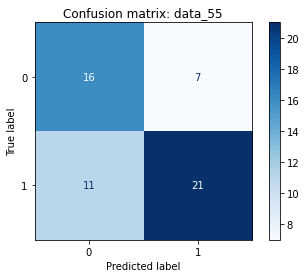

In [45]:
dlpfc_ModelBuild.get_confusion_matrix()

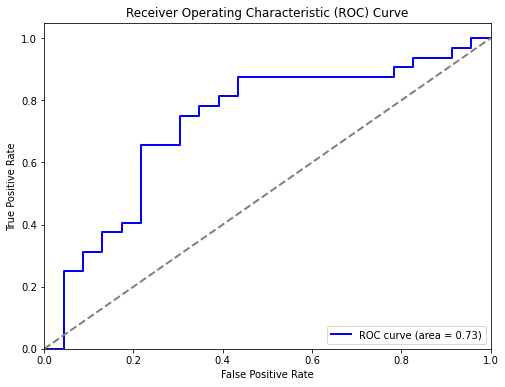

In [46]:
dlpfc_ModelBuild.get_roc_auc()

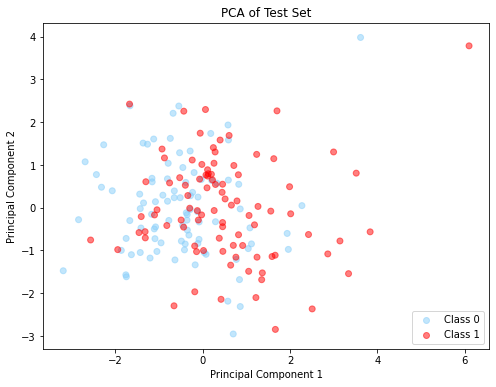

In [47]:
dlpfc_ModelBuild.get_pca()